QSC Capacity for different error probabilities:

Pe = 0.00:
Capacity = 2.0000 bits
Entropy = 0.0000
P(correct) = 1.0000
P(each error) = 0.0000

Pe = 0.10:
Capacity = 1.3725 bits
Entropy = 0.6275
P(correct) = 0.9000
P(each error) = 0.0333

Pe = 0.25:
Capacity = 0.7925 bits
Entropy = 1.2075
P(correct) = 0.7500
P(each error) = 0.0833

Pe = 0.50:
Capacity = 0.2075 bits
Entropy = 1.7925
P(correct) = 0.5000
P(each error) = 0.1667

Pe = 0.75:
Capacity = 0.0000 bits
Entropy = 2.0000
P(correct) = 0.2500
P(each error) = 0.2500


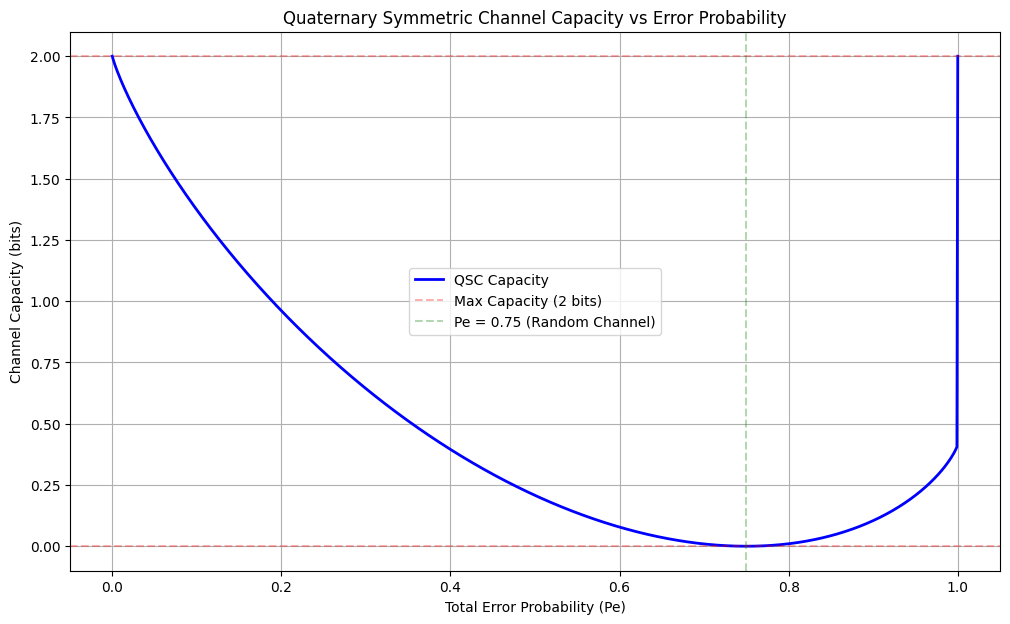

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def qsc_entropy(pe):
    """
    Calculate the entropy for a Quaternary Symmetric Channel.
    pe: probability of error (total error probability)
    Returns: entropy of the channel
    """
    # For QSC, if total error probability is pe, each wrong symbol has pe/3 probability
    # Probability of correct transmission is (1-pe)
    if pe == 0 or pe == 1:
        return 0

    p_correct = 1 - pe  # probability of correct transmission
    p_each_error = pe/3  # probability of each specific error

    # Calculate entropy using the full formula
    H = 0
    if p_correct > 0:
        H -= p_correct * np.log2(p_correct)
    if p_each_error > 0:
        H -= 3 * (p_each_error * np.log2(p_each_error))

    return H

def qsc_capacity(pe):
    """
    Calculate capacity of Quaternary Symmetric Channel
    Maximum error-free information is log2(4) = 2 bits
    """
    return 2 - qsc_entropy(pe)

def plot_qsc_capacity():
    # Generate error probabilities from 0 to 1
    pe_values = np.linspace(0, 1, 1000)

    # Calculate capacities
    capacities = [qsc_capacity(pe) for pe in pe_values]

    # Create the plot
    plt.figure(figsize=(12, 7))
    plt.plot(pe_values, capacities, 'b-', linewidth=2, label='QSC Capacity')

    # Add reference lines
    plt.axhline(y=2, color='r', linestyle='--', alpha=0.3, label='Max Capacity (2 bits)')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=0.75, color='g', linestyle='--', alpha=0.3,
                label='Pe = 0.75 (Random Channel)')

    # Customize the plot
    plt.grid(True)
    plt.title('Quaternary Symmetric Channel Capacity vs Error Probability')
    plt.xlabel('Total Error Probability (Pe)')
    plt.ylabel('Channel Capacity (bits)')
    plt.legend()

    return plt

# Example calculations
if __name__ == "__main__":
    test_pe_values = [0, 0.1, 0.25, 0.5, 0.75]

    print("QSC Capacity for different error probabilities:")
    for pe in test_pe_values:
        capacity = qsc_capacity(pe)
        print(f"\nPe = {pe:.2f}:")
        print(f"Capacity = {capacity:.4f} bits")
        print(f"Entropy = {qsc_entropy(pe):.4f}")

        # Show probability distribution
        p_correct = 1 - pe
        p_each_error = pe/3
        print(f"P(correct) = {p_correct:.4f}")
        print(f"P(each error) = {p_each_error:.4f}")

    # Create and show the plot
    plt = plot_qsc_capacity()
    plt.show()